In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import os, sys # For filepaths
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
import pickle
import sklearn.preprocessing as pre
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

exported_data_path = os.path.join(home_directory, 'Exported_Data')

In [3]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))
print("Dataset shape: ", dataset.shape)

Dataset shape:  (10000, 785)


In [4]:
test_dataset = np.load(os.path.join(datasets_path, 'fashion_test.npy'))

In [5]:
X_train = dataset[:, :-1]  # Define the images as all columns except the last one
y_train = dataset[:, -1] # Define the labels as the last column

In [6]:
X_test = test_dataset[:, :-1]  # Define the images as all columns except the last one
y_test = test_dataset[:, -1] # Define the labels as the last column

In [7]:
# scaling the images
scaler = pre.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
# scaling the images
scaler = pre.StandardScaler()
X_test = scaler.fit_transform(X_test)

In [9]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

In [10]:
# import classifiers 
from sklearn import svm 
from CNN import CNN
from Bayes import Bayes_classifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Get final models

## SVM classifier

In [11]:
if os.path.exists('svm_model.pkl'):
    svm_model = pickle.load(open('svm_model.pkl', 'rb'))
    svm_predictions = pickle.load(open('svm_predictions.pkl', 'rb'))
else:
    svm_model = svm.SVC(C=10)
    svm_model.fit(X_train,y_train)
    svm_predictions = svm_model.predict(X_test)
    pickle.dump(svm_model,open('svm_model.pkl', 'wb'))
    pickle.dump(svm_predictions,open('svm_predictions.pkl', 'wb'))

In [12]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='macro')
svm_precision= precision_score(y_test, svm_predictions, zero_division=0, average='macro')
svm_recall= recall_score(y_test, svm_predictions, average='macro')

In [13]:
print(svm_accuracy, svm_f1, svm_precision, svm_recall)

0.8508 0.8513349500825498 0.8519939883761722 0.8507999999999999


In [14]:
print(classification_report(y_test, svm_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.7965    0.8140    0.8051      1000
           1     0.9877    0.9630    0.9752      1000
           2     0.8545    0.8630    0.8587      1000
           3     0.9089    0.8980    0.9034      1000
           4     0.7124    0.7160    0.7142      1000

    accuracy                         0.8508      5000
   macro avg     0.8520    0.8508    0.8513      5000
weighted avg     0.8520    0.8508    0.8513      5000



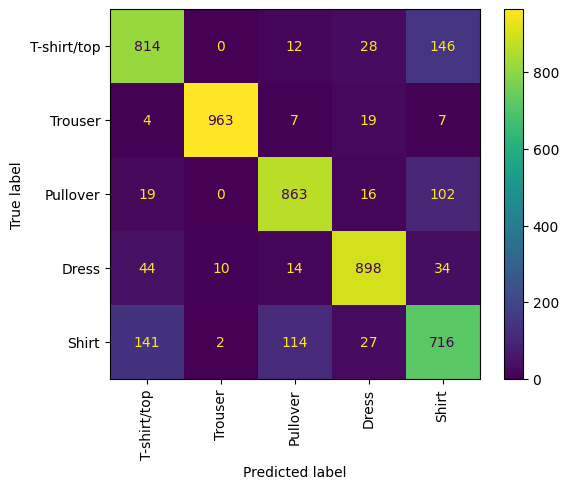

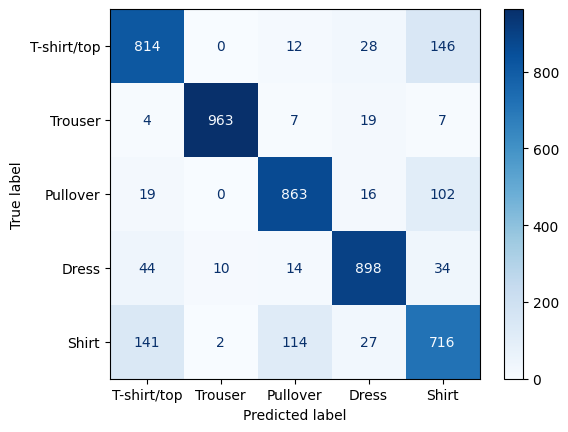

In [15]:
cm_svm = ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=target_names,xticks_rotation='vertical' )
cm_svm.plot(cmap='Blues', values_format='d')

## Naive Bayes classifier

In [16]:
if os.path.exists('bayes_model.pkl'):
    Bayes = pickle.load(open('bayes_model.pkl', 'rb'))
    bayes_predictions = pickle.load(open('bayes_predictions.pkl', 'rb'))
else:
    bandwidth = 1.06 * np.std(X_train) * np.power(X_train.shape[0], -1/5)
    Bayes = Bayes_classifier(bandwidth)
    Bayes.fit(X_train, y_train)
    bayes_predictions = Bayes.predict(X_test)
    pickle.dump(Bayes,open('bayes_model.pkl', 'wb'))
    pickle.dump(bayes_predictions,open('bayes_predictions.pkl', 'wb'))

In [17]:
print(classification_report(y_test, bayes_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.5792    0.7680    0.6604      1000
           1     0.9753    0.9470    0.9609      1000
           2     0.7564    0.6550    0.7020      1000
           3     0.8071    0.7780    0.7923      1000
           4     0.4948    0.4320    0.4613      1000

    accuracy                         0.7160      5000
   macro avg     0.7225    0.7160    0.7154      5000
weighted avg     0.7225    0.7160    0.7154      5000



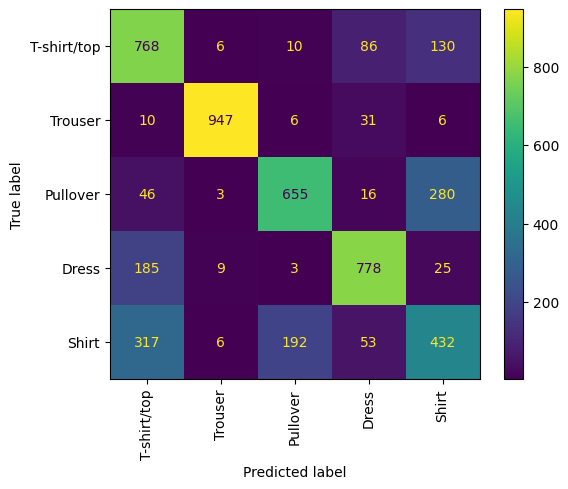

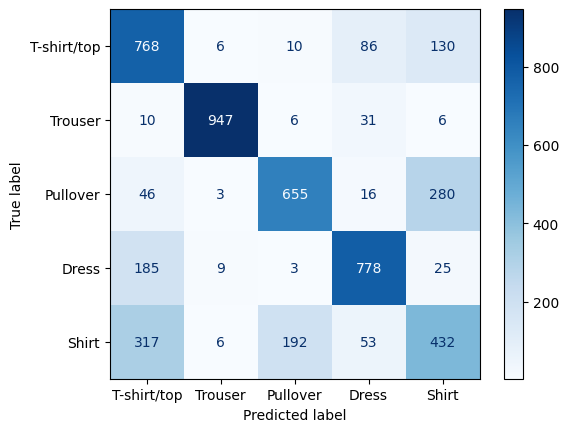

In [18]:
cm_bayes = ConfusionMatrixDisplay.from_predictions(y_test, bayes_predictions, display_labels=target_names,xticks_rotation='vertical' )
cm_bayes.plot(cmap='Blues', values_format='d')

## CNN classifier

In [19]:
if os.path.exists('cnn_model.pkl'):
    cnn = pickle.load(open('cnn_model.pkl', 'rb'))
    cnn_predictions = pickle.load(open('cnn_predictions.pkl', 'rb'))
else:
    cnn = CNN()
    cnn.load_model('cnn_model')
    cnn_predictions = cnn.predict(X_test)
    pickle.dump(cnn,open('cnn_model.pkl', 'wb'))
    pickle.dump(cnn_predictions,open('cnn_predictions.pkl', 'wb'))

In [20]:
print(classification_report(y_test, cnn_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.8361    0.8570    0.8464      1000
           1     0.9899    0.9800    0.9849      1000
           2     0.8989    0.8980    0.8984      1000
           3     0.9272    0.9170    0.9221      1000
           4     0.7743    0.7720    0.7732      1000

    accuracy                         0.8848      5000
   macro avg     0.8853    0.8848    0.8850      5000
weighted avg     0.8853    0.8848    0.8850      5000



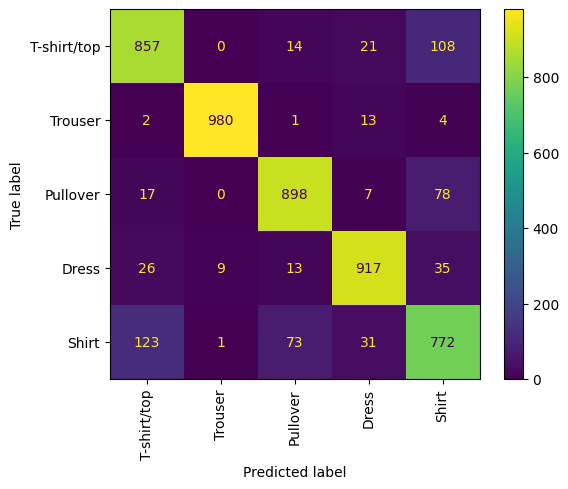

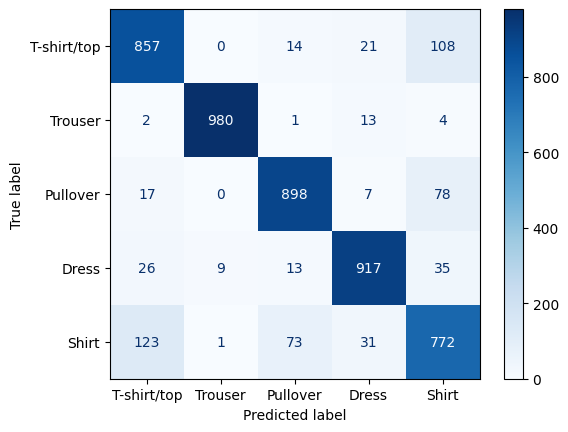

In [21]:
cm_cnn = ConfusionMatrixDisplay.from_predictions(y_test, cnn_predictions, display_labels=target_names,xticks_rotation='vertical' )
cm_cnn.plot(cmap='Blues', values_format='d')

# Final Plots

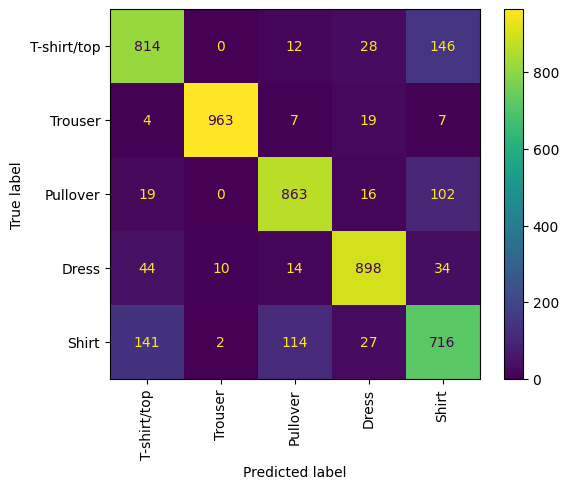

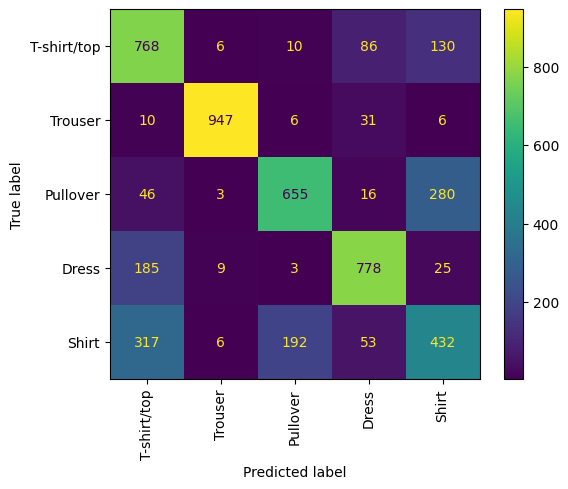

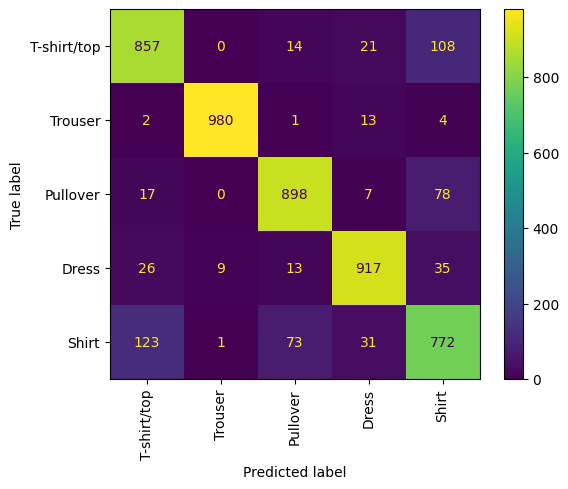

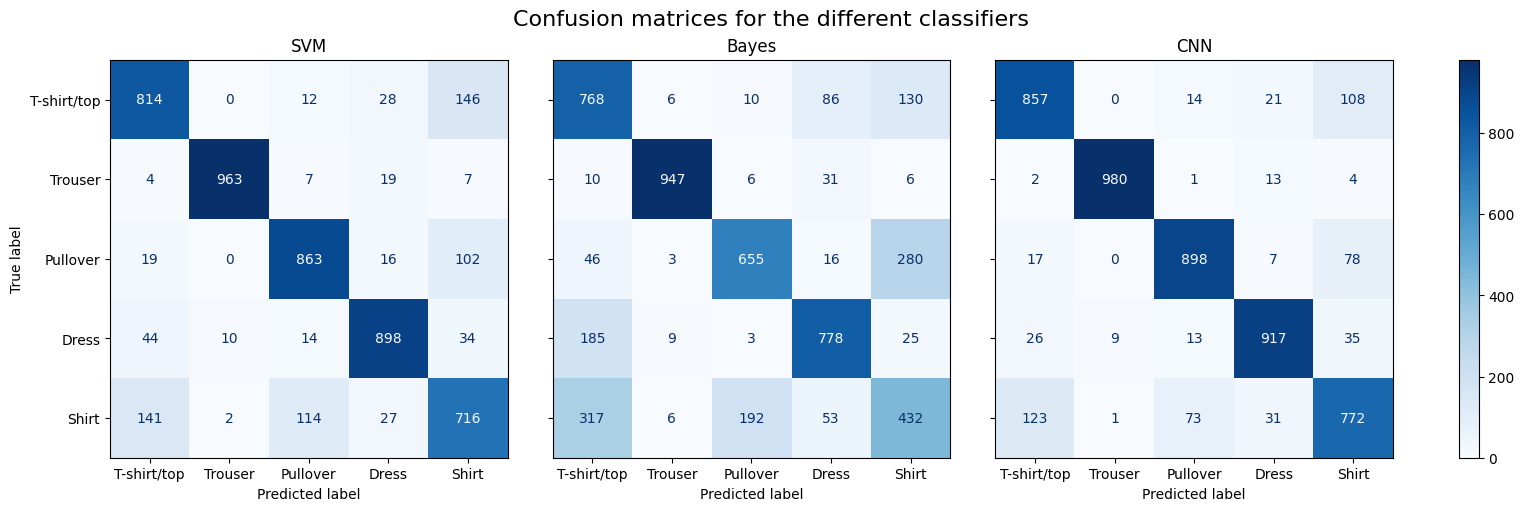

In [22]:
# Create confusion matrices
cm_svm = ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions, display_labels=target_names, xticks_rotation='vertical' )
cm_bayes = ConfusionMatrixDisplay.from_predictions(y_test, bayes_predictions, display_labels=target_names, xticks_rotation='vertical' )
cm_cnn = ConfusionMatrixDisplay.from_predictions(y_test, cnn_predictions, display_labels=target_names, xticks_rotation='vertical' )

# Plot all the confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, constrained_layout=True)

cm_svm.plot(cmap='Blues', values_format='d', ax=ax[0], colorbar=False)
cm_bayes.plot(cmap='Blues', values_format='d', ax=ax[1], colorbar=False)
im = cm_cnn.plot(cmap='Blues', values_format='d', ax=ax[2], colorbar=False).im_

ax[0].set_title('SVM')
ax[1].set_title('Bayes')
ax[2].set_title('CNN')

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[1].set_ylabel('')
ax[2].set_ylabel('')

fig.colorbar(im, ax=ax, orientation='vertical')

fig.suptitle('Confusion matrices for the different classifiers', fontsize=16)

plt.savefig(os.path.join(exported_data_path, 'Confusion_matrices.png'), dpi=500)
plt.show()

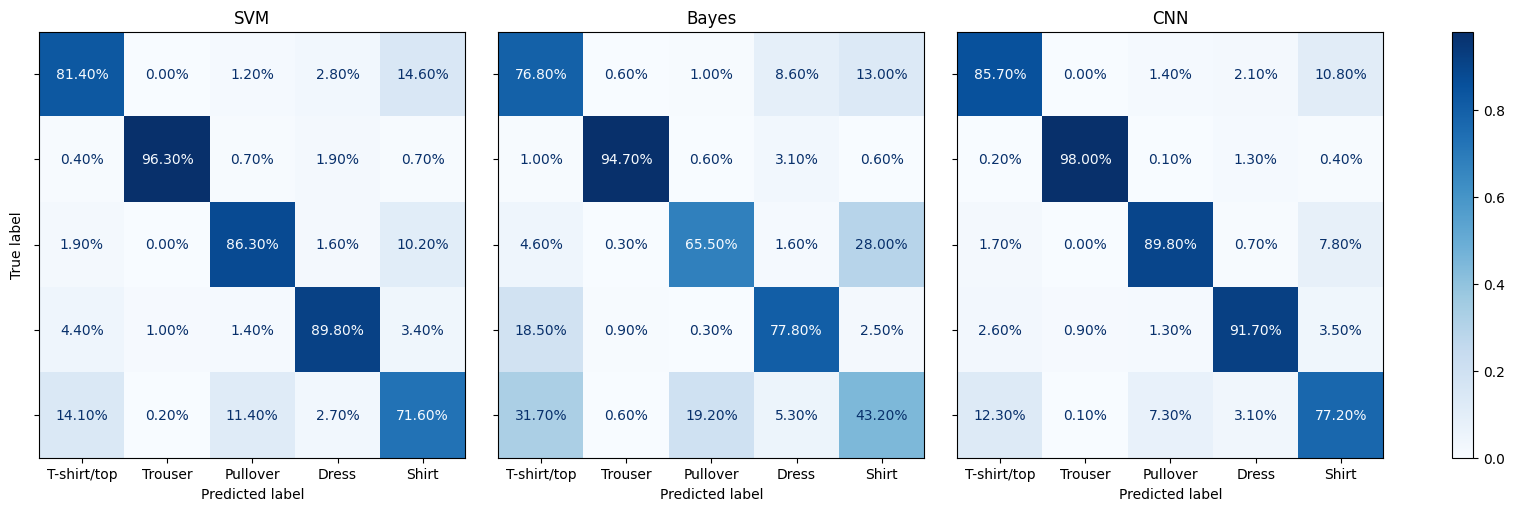

In [23]:
# Calculate confusion matrices with normalization
cm_svm = confusion_matrix(y_test, svm_predictions, normalize='true')
cm_bayes = confusion_matrix(y_test, bayes_predictions, normalize='true')
cm_cnn = confusion_matrix(y_test, cnn_predictions, normalize='true')

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names)
disp_bayes = ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=target_names)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=target_names)

# Plot all the confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

disp_svm.plot(cmap='Blues', ax=ax[0], colorbar=False, values_format='.2%')
disp_bayes.plot(cmap='Blues', ax=ax[1], colorbar=False, values_format='.2%')
im = disp_cnn.plot(cmap='Blues', ax=ax[2], colorbar=False, values_format='.2%').im_

ax[0].set_title('SVM')
ax[1].set_title('Bayes')
ax[2].set_title('CNN')

for axes in ax[1:]:
    axes.set_yticklabels([])
    axes.set_ylabel('')

fig.colorbar(im, ax=ax, orientation='vertical')

plt.savefig(os.path.join(exported_data_path, 'Confusion_matrices_percentages.png'), dpi=500)
plt.show()

In [24]:
# Performance metrics for the different classifiers
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='macro')
svm_precision = precision_score(y_test, svm_predictions, zero_division=0, average='macro')
svm_recall = recall_score(y_test, svm_predictions, average='macro')

bayes_accuracy = accuracy_score(y_test, bayes_predictions)
bayes_f1 = f1_score(y_test, bayes_predictions, average='macro')
bayes_precision = precision_score(y_test, bayes_predictions, zero_division=0, average='macro')
bayes_recall = recall_score(y_test, bayes_predictions, average='macro')

cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_f1 = f1_score(y_test, cnn_predictions, average='macro')
cnn_precision = precision_score(y_test, cnn_predictions, zero_division=0, average='macro')
cnn_recall = recall_score(y_test, cnn_predictions, average='macro')

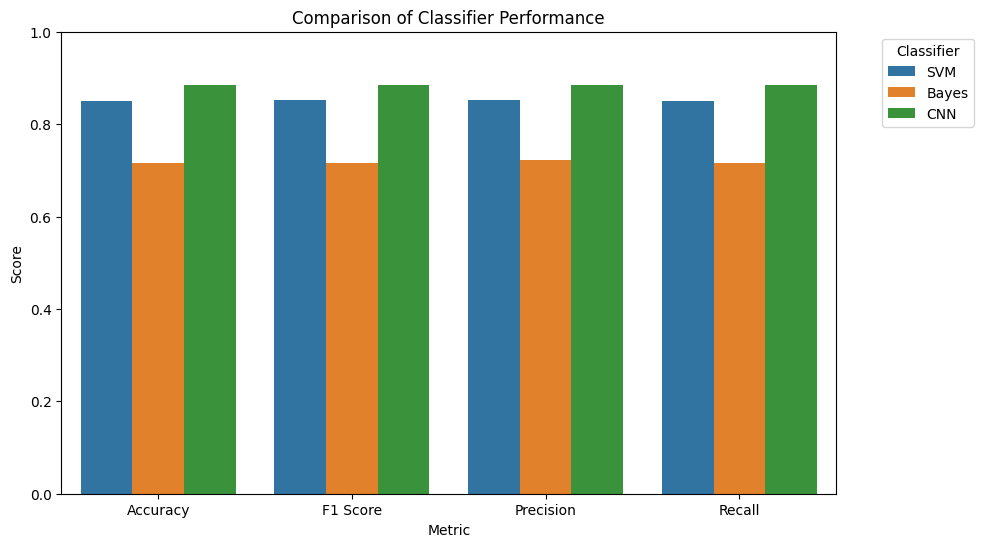

In [25]:
import seaborn as sns

metrics_data = {
    'Accuracy': [svm_accuracy, bayes_accuracy, cnn_accuracy],
    'F1 Score': [svm_f1, bayes_f1, cnn_f1],
    'Precision': [svm_precision, bayes_precision, cnn_precision],
    'Recall': [svm_recall, bayes_recall, cnn_recall]
}

df_metrics = pd.DataFrame(metrics_data, index=['SVM', 'Bayes', 'CNN']).T.reset_index()
df_metrics = df_metrics.melt(id_vars='index', value_vars=['SVM', 'Bayes', 'CNN'])
df_metrics.columns = ['Metric', 'Classifier', 'Value']


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Classifier', data=df_metrics)
plt.title('Comparison of Classifier Performance')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming your scores are between 0 and 1
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(exported_data_path, 'Performance_metrics.png'), dpi=500)
plt.show()

In [26]:
print('SVM')
print('Accuracy:', round(svm_accuracy, 4))
print('F1 Score:', round(svm_f1, 4))
print('Precision:', round(svm_precision, 4))
print('Recall:', round(svm_recall, 4))
print()
print('CNN')
print('Accuracy:', round(cnn_accuracy, 4))
print('F1 Score:', round(cnn_f1, 4))
print('Precision:', round(cnn_precision, 4))
print('Recall:', round(cnn_recall, 4))
print()
print('Bayes')
print('Accuracy:', round(bayes_accuracy, 4))
print('F1 Score:', round(bayes_f1, 4))
print('Precision:', round(bayes_precision, 4))
print('Recall:', round(bayes_recall, 4))

SVM
Accuracy: 0.8508
F1 Score: 0.8513
Precision: 0.852
Recall: 0.8508

CNN
Accuracy: 0.8848
F1 Score: 0.885
Precision: 0.8853
Recall: 0.8848

Bayes
Accuracy: 0.716
F1 Score: 0.7154
Precision: 0.7225
Recall: 0.716
